In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.feature import hog, greycomatrix, greycoprops
from skimage.filters import threshold_otsu
import cv2, pathlib, os, glob
from sklearn import svm, tree, ensemble, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [2]:
img_cnv = cv2.imread('resimler/Retina_OCT_dataset_2/CNV/CNV-28682-1.jpeg')
img_dme = cv2.imread('resimler/Retina_OCT_dataset_2/DME/DME-15307-9.jpeg')
img_dru = cv2.imread('resimler/Retina_OCT_dataset_2/DRUSEN/DRUSEN-95633-6.jpeg')
img_nor = cv2.imread('resimler/Retina_OCT_dataset_2/NORMAL/NORMAL-12494-30.jpeg')

img_cnv = cv2.cvtColor(img_cnv,cv2.COLOR_BGR2RGB)
img_dme = cv2.cvtColor(img_dme,cv2.COLOR_BGR2RGB)
img_dru = cv2.cvtColor(img_dru,cv2.COLOR_BGR2RGB)
img_nor = cv2.cvtColor(img_nor,cv2.COLOR_BGR2RGB)

img_cnv[img_cnv == (255,255,255)] = 0
img_dme[img_dme == (255,255,255)] = 0
img_dru[img_dru == (255,255,255)] = 0
img_nor[img_nor == (255,255,255)] = 0

img_copy_cnv = np.copy(img_cnv)
img_copy_dme = np.copy(img_dme)
img_copy_dru = np.copy(img_dru)
img_copy_nor = np.copy(img_nor)


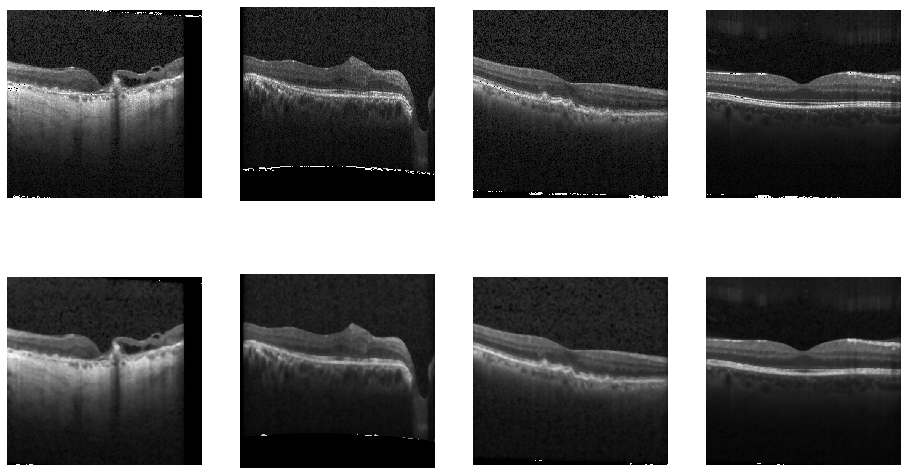

In [4]:
# Medyan filtresi
blurred_img_cnv = cv2.medianBlur(img_cnv, ksize=7)
blurred_img_dme = cv2.medianBlur(img_dme, ksize=7)
blurred_img_dru = cv2.medianBlur(img_dru, ksize=7)
blurred_img_nor = cv2.medianBlur(img_nor, ksize=7)

fig1,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4,nrows=2,figsize=(16,9))
ax1.imshow(img_cnv) ; ax1.axis('off') ; ax2.imshow(img_dme) ; ax2.axis('off') ;  ax3.imshow(img_dru) ; ax3.axis('off')
ax4.imshow(img_nor) ; ax4.axis('off') ; ax5.imshow(blurred_img_cnv) ; ax5.axis('off') ; ax6.imshow(blurred_img_dme)
ax6.axis('off') ; ax7.imshow(blurred_img_dru) ; ax7.axis('off') ;ax8.imshow(blurred_img_nor) ; ax8.axis('off')
plt.show()

In [5]:
#HSV IMAGE
hsv_img_cnv = cv2.cvtColor(blurred_img_cnv, cv2.COLOR_BGR2HSV)
hsv_img_dme = cv2.cvtColor(blurred_img_dme, cv2.COLOR_BGR2HSV)
hsv_img_dru = cv2.cvtColor(blurred_img_dru, cv2.COLOR_BGR2HSV)
hsv_img_nor = cv2.cvtColor(blurred_img_nor, cv2.COLOR_BGR2HSV)

h_cnv,s_cnv,v_cnv = hsv_img_cnv[:,:,0] , hsv_img_cnv[:,:,1] , hsv_img_cnv[:,:,2]
h_dme,s_dme,v_dme = hsv_img_dme[:,:,0] , hsv_img_dme[:,:,1] , hsv_img_dme[:,:,2]
h_dru,s_dru,v_dru = hsv_img_dru[:,:,0] , hsv_img_dru[:,:,1] , hsv_img_dru[:,:,2]
h_nor,s_nor,v_nor = hsv_img_nor[:,:,0] , hsv_img_nor[:,:,1] , hsv_img_nor[:,:,2]

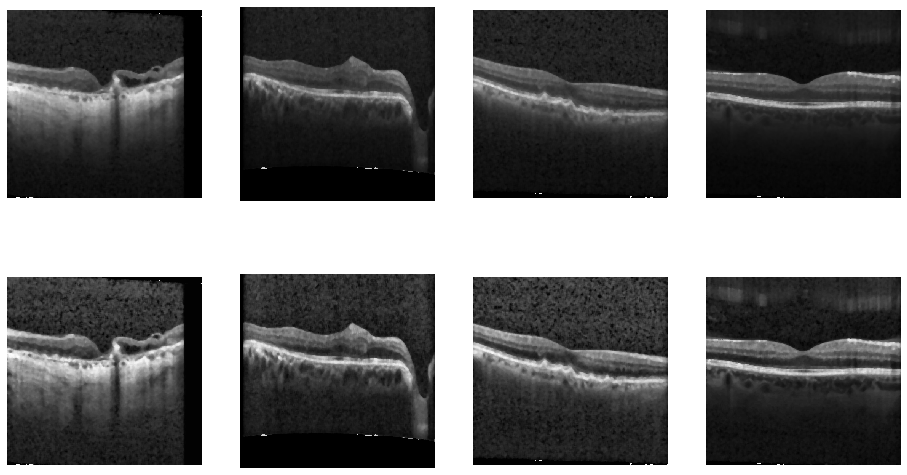

In [6]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
img_hist_cnv = clahe.apply(v_cnv)
img_hist_dme = clahe.apply(v_dme)
img_hist_dru = clahe.apply(v_dru)
img_hist_nor = clahe.apply(v_nor)

fig2,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4,nrows=2,figsize=(16,9))
ax1.imshow(v_cnv,cmap='gray') ; ax1.axis('off') ; ax2.imshow(v_dme,cmap='gray') ; ax2.axis('off') ;  ax3.imshow(v_dru,cmap='gray') ; ax3.axis('off')
ax4.imshow(v_nor,cmap='gray') ; ax4.axis('off') ; ax5.imshow(img_hist_cnv,cmap='gray') ; ax5.axis('off') ; ax6.imshow(img_hist_dme,cmap='gray')
ax6.axis('off') ; ax7.imshow(img_hist_dru,cmap='gray') ; ax7.axis('off') ;ax8.imshow(img_hist_nor,cmap='gray') ; ax8.axis('off')
plt.show()

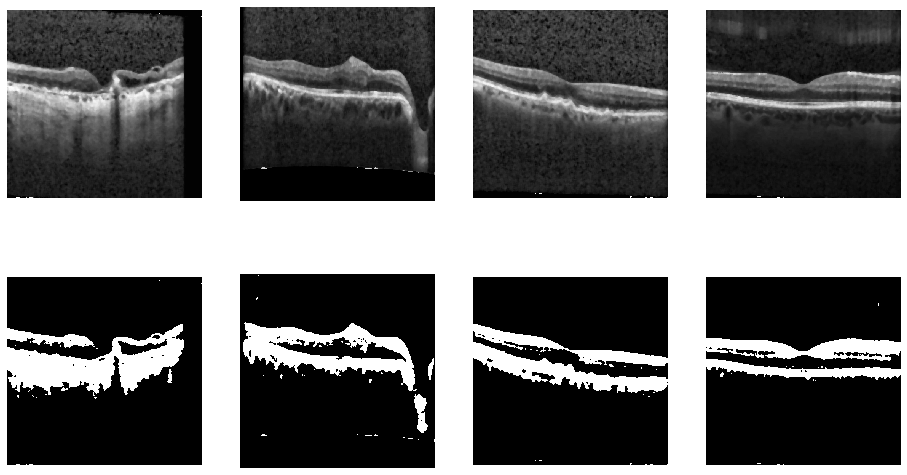

In [8]:
# THRESHOLDING
threshold_val_cnv = threshold_otsu(img_hist_cnv)
threshold_val_dme = threshold_otsu(img_hist_dme)
threshold_val_dru = threshold_otsu(img_hist_dru)
threshold_val_nor = threshold_otsu(img_hist_nor)

threshold_val_cnv, threshold_img_cnv = cv2.threshold(img_hist_cnv,threshold_val_cnv,255,cv2.THRESH_BINARY)
threshold_val_dme, threshold_img_dme = cv2.threshold(img_hist_dme,threshold_val_dme,255,cv2.THRESH_BINARY)
threshold_val_dru, threshold_img_dru = cv2.threshold(img_hist_dru,threshold_val_dru,255,cv2.THRESH_BINARY)
threshold_val_nor, threshold_img_nor = cv2.threshold(img_hist_nor,threshold_val_nor,255,cv2.THRESH_BINARY)

fig3,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4,nrows=2,figsize=(16,9))
ax1.imshow(img_hist_cnv,cmap='gray') ; ax1.axis('off') ; ax2.imshow(img_hist_dme,cmap='gray') ; ax2.axis('off') ;  ax3.imshow(img_hist_dru,cmap='gray') ; ax3.axis('off')
ax4.imshow(img_hist_nor,cmap='gray') ; ax4.axis('off') ; ax5.imshow(threshold_img_cnv,cmap='gray') ; ax5.axis('off') ; ax6.imshow(threshold_img_dme,cmap='gray')
ax6.axis('off') ; ax7.imshow(threshold_img_dru,cmap='gray') ; ax7.axis('off') ;ax8.imshow(threshold_img_nor,cmap='gray') ; ax8.axis('off')
plt.show()

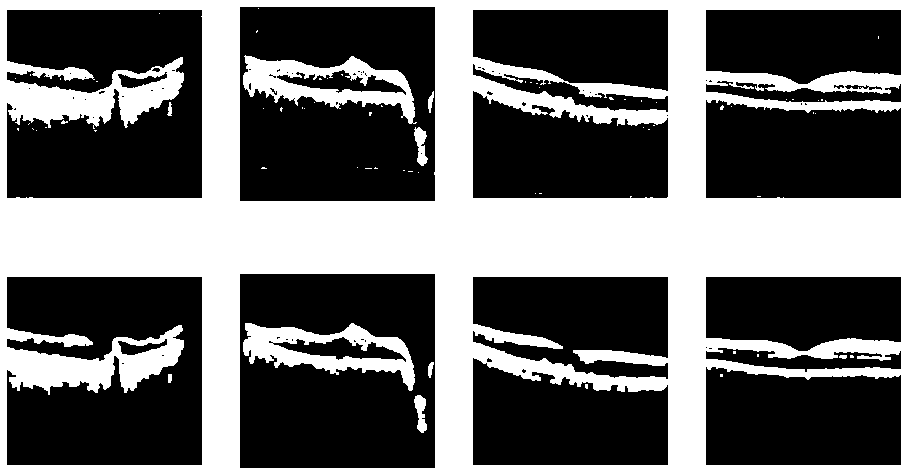

In [9]:
# Opening operation
mask_cnv = cv2.erode(threshold_img_cnv, kernel=np.ones((7, 7)), iterations=1)
mask_dme = cv2.erode(threshold_img_dme, kernel=np.ones((7, 7)), iterations=1)
mask_dru = cv2.erode(threshold_img_dru, kernel=np.ones((7, 7)), iterations=1)
mask_nor = cv2.erode(threshold_img_nor, kernel=np.ones((7, 7)), iterations=1)

mask2_cnv = cv2.dilate(mask_cnv, kernel=np.ones((7, 7)), iterations=1)
mask2_dme = cv2.dilate(mask_dme, kernel=np.ones((7, 7)), iterations=1)
mask2_dru = cv2.dilate(mask_dru, kernel=np.ones((7, 7)), iterations=1)
mask2_nor = cv2.dilate(mask_nor, kernel=np.ones((7, 7)), iterations=1)

# Closing operation
mask3_cnv = cv2.dilate(mask2_cnv, kernel=np.ones((3, 3)), iterations=1)
mask3_dme = cv2.dilate(mask2_dme, kernel=np.ones((3, 3)), iterations=1)
mask3_dru = cv2.dilate(mask2_dru, kernel=np.ones((3, 3)), iterations=1)
mask3_nor = cv2.dilate(mask2_nor, kernel=np.ones((3, 3)), iterations=1)

img_clean_cnv = cv2.erode(mask3_cnv, kernel=np.ones((3, 3)), iterations=1)
img_clean_dme = cv2.erode(mask3_dme, kernel=np.ones((3, 3)), iterations=1)
img_clean_dru = cv2.erode(mask3_dru, kernel=np.ones((3, 3)), iterations=1)
img_clean_nor = cv2.erode(mask3_nor, kernel=np.ones((3, 3)), iterations=1)

fig4,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4,nrows=2,figsize=(16,9))
ax1.imshow(threshold_img_cnv,cmap='gray') ; ax1.axis('off') ; ax2.imshow(threshold_img_dme,cmap='gray') ; ax2.axis('off') ;  ax3.imshow(threshold_img_dru,cmap='gray') ; ax3.axis('off')
ax4.imshow(threshold_img_nor,cmap='gray') ; ax4.axis('off') ; ax5.imshow(img_clean_cnv,cmap='gray') ; ax5.axis('off') ; ax6.imshow(img_clean_dme,cmap='gray')
ax6.axis('off') ; ax7.imshow(img_clean_dru,cmap='gray') ; ax7.axis('off') ;ax8.imshow(img_clean_nor,cmap='gray') ; ax8.axis('off')
plt.show()

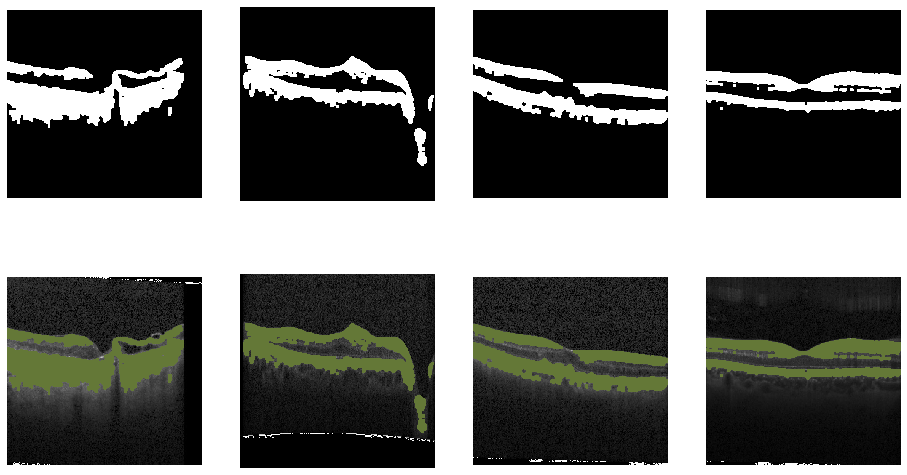

In [10]:
#Contour Detection
contours_cnv, _ = cv2.findContours(img_clean_cnv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_dme, _ = cv2.findContours(img_clean_dme, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_dru, _ = cv2.findContours(img_clean_dru, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_nor, _ = cv2.findContours(img_clean_nor, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_image = cv2.drawContours(img_cnv, contours_cnv,-1, (100,120,55), thickness=-1)
contour_image = cv2.drawContours(img_dme, contours_dme,-1, (100,120,55), thickness=-1)
contour_image = cv2.drawContours(img_dru, contours_dru,-1, (100,120,55), thickness=-1)
contour_image = cv2.drawContours(img_nor, contours_nor,-1, (100,120,55), thickness=-1)

fig5,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4,nrows=2,figsize=(16,9))
ax1.imshow(img_clean_cnv,cmap='gray') ; ax1.axis('off') ; ax2.imshow(img_clean_dme,cmap='gray') ; ax2.axis('off') ;  ax3.imshow(img_clean_dru,cmap='gray') ; ax3.axis('off')
ax4.imshow(img_clean_nor,cmap='gray') ; ax4.axis('off') ; ax5.imshow(img_cnv,cmap='gray') ; ax5.axis('off') ; ax6.imshow(img_dme,cmap='gray')
ax6.axis('off') ; ax7.imshow(img_dru,cmap='gray') ; ax7.axis('off') ;ax8.imshow(img_nor,cmap='gray') ; ax8.axis('off')
plt.show()

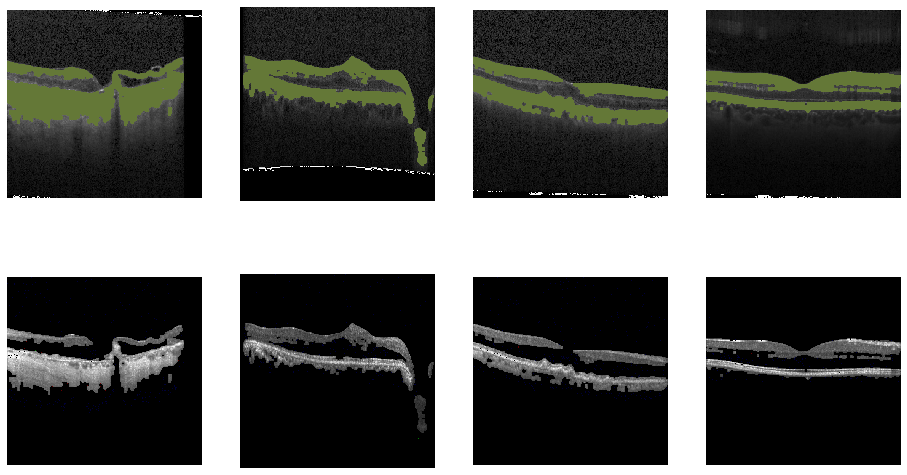

In [11]:
img_copy_cnv[img_cnv != (100,120,55)] = 0
img_copy_dme[img_dme != (100,120,55)] = 0
img_copy_dru[img_dru != (100,120,55)] = 0
img_copy_nor[img_nor != (100,120,55)] = 0

fig6,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(ncols=4,nrows=2,figsize=(16,9))
ax1.imshow(img_cnv,cmap='gray') ; ax1.axis('off') ; ax2.imshow(img_dme,cmap='gray') ; ax2.axis('off') ;  ax3.imshow(img_dru,cmap='gray') ; ax3.axis('off')
ax4.imshow(img_nor,cmap='gray') ; ax4.axis('off') ; ax5.imshow(img_copy_cnv,cmap='gray') ; ax5.axis('off') ; ax6.imshow(img_copy_dme,cmap='gray')
ax6.axis('off') ; ax7.imshow(img_copy_dru,cmap='gray') ; ax7.axis('off') ;ax8.imshow(img_copy_nor,cmap='gray') ; ax8.axis('off')
plt.show()